In [43]:
pip install xgboost

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from google.colab import drive
drive.mount('/content/drive')

full_data = pd.read_csv("/content/drive/MyDrive/Data Mining Project/Notebooks/ok_ng_data.csv")
full_data.drop(['Unnamed: 0'], axis=1, inplace = True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
full_data.head(50)

,scores_P1,scores_P2,scores_P3,scores_P4,scores_P5,scores_P6,scores_P7,scores_P8,scores_P9,scores_P10,scores_sum,cycle_time_P10,measurement_P3,Op_P1_nan,Op_P9_P9-2,measurement_P10,Op_P4_P4-3,Op_P2_P2-3,cycle_time_P6,cycle_time_P1,dist_ct_P10,Op_P3_P3-4,Op_P2_P2-2,dist_measurement_P1,Op_P3_nan,timestamp_P6,Op_P10_P10-3,Op_P3_P3-2,Op_P5_P5-3,Op_P6_P6-2,dist_measurement_P4,dist_ct_P5,Op_P4_nan,Op_P6_P6-5,timestamp_P2,dist_measurement_P10,dist_ct_P4,Op_P7_P7-4,Op_P7_nan,dist_ct_P6,timestamp_P7,cycle_time_P5,Op_P10_nan,timestamp_P5,measurement_P9,dist_ct_P7,measurement_P8,Op_P1_P1-2,Op_P9_P9-5,Op_P7_P7-2,dist_measurement_P3,Op_P10_P10-5,timestamp_P9,Op_P3_P3-5,Op_P9_P9-3,dist_measurement_P6,Op_P5_P5-5,Op_P6_P6-4,Op_P3_P3-3,Op_P5_P5-2,Op_P5_nan,Op_P5_P5-4,Op_P10_P10-6,dist_ct_P8,Op_P9_P9-6,cycle_time_P8,Op_P6_P6-6,measurement_P7,Op_P8_nan,measurement_P5,Op_P4_P4-2,timestamp_P4,dist_ct_P9,timestamp_P1,dist_measurement_P9,Op_P10_P10-2,Op_P9_P9-4,measurement_P6,measurement_P1,Op_P9_nan,timestamp_P10,Op_P7_P7-5,dist_ct_P2,Op_P6_nan,cycle_time_P2,dist_measurement_P2,cycle_time_P4,Op_P8_P8-2,measurement_P4,Op_P10_P10-4,dist_measurement_P7,timestamp_P3,cycle_time_P3,Op_P6_P6-3,dist_ct_P1,Op_P2_nan,Unit_id,timestamp_P8,cycle_time_P9,Op_P1_P1-3,measurement_P2,dist_measurement_P8,dist_ct_P3,cycle_time_P7,Op_P7_P7-3,dist_measurement_P5,pass
0,0.897995,0.113652,0.241847,0.272625,0.169099,0.841244,0.000000,0.000000,0.000000,0.000000,0.159741,0.000000,0.098645,0,0,0.000000,1,0,0.084559,0.132353,0.000000,0,1,0.549110,0,0.015417,0,1,1,0,0.351080,0.189110,0,0,0.002871,0.000000,0.010785,0,1,0.219605,0.000000,0.047794,1,0.012653,0.000000,0.000000,0.000000,1,0,0,0.351080,0,0.000000,0,0,1.000000,0,0,0,0,0,0,0,0.000000,0,0.000000,0,0.000000,1,0.304236,0,0.010420,0.000000,0.000000,0.000000,0,0,0.389469,0.011195,1,0.000000,0,0.788741,0,0.091912,0.351080,0.110294,0,0.098645,0,0.000000,0.007283,0.198529,1,0.079286,0,2,0.000000,0.000000,0,0.098645,0.000000,0.051940,0.000000,0,0.086031,0
1,1.000000,0.060888,0.028746,0.000629,0.659608,0.510918,0.000000,0.000000,0.000000,0.000000,0.131451,0.000000,0.099851,0,0,0.000000,0,1,0.077206,0.194853,0.000000,0,0,0.666961,0,0.015311,0,0,0,1,0.219519,0.123925,0,0,0.003243,0.000000,0.025212,0,1,0.234090,0.000000,0.080882,1,0.012653,0.000000,0.000000,0.000000,0,0,0,0.219519,0,0.000000,0,0,0.690772,0,0,1,1,0,0,0,0.000000,0,0.000000,0,0.000000,1,0.298351,1,0.009942,0.000000,0.000904,0.000000,0,0,0.405019,0.000000,1,0.000000,0,0.861169,0,0.055147,0.219519,0.091912,0,0.099851,0,0.000000,0.007071,0.158088,0,0.202413,0,3,0.000000,0.000000,1,0.099851,0.000000,0.131611,0.000000,0,0.551288,0
2,0.000000,0.159792,0.712903,0.683320,0.492516,0.075542,0.532958,0.767220,0.815451,0.758618,0.654982,0.283088,0.107205,0,0,0.893352,0,0,0.242647,0.091912,0.015028,1,0,0.113703,0,0.020893,0,0,0,0,0.577824,0.100383,0,0,0.005157,0.090513,0.075911,0,0,0.091616,0.024880,0.194853,0,0.015843,0.996373,0.011532,0.996373,0,0,0,0.577824,0,0.030569,0,0,0.169143,0,0,0,0,0,1,0,0.017732,0,0.018382,0,0.400234,0,0.307031,0,0.011483,0.079670,0.001808,0.406191,0,0,0.400234,0.007201,0,0.036204,0,0.723556,0,0.125000,0.577824,0.066176,0,0.107205,0,0.179246,0.008985,0.158088,0,0.000167,0,4,0.026688,0.161765,0,0.107205,0.406191,0.131611,0.169118,0,0.390698,1
3,0.840604,0.113136,0.275655,0.235905,0.275766,0.575001,0.812955,0.633489,0.714754,0.898407,0.734595,0.316176,0.098645,0,1,0.890393,0,0,0.250000,0.091912,0.049939,0,1,0.549110,0,0.022541,0,0,0,1,0.351080,0.100383,0,0,0.005795,0.413077,0.083154,0,0,0.106101,0.026582,0.194853,0,0.017384,0.991440,0.004289,0.991440,1,0,1,0.351080,0,0.033014,1,0,0.690772,0,0,0,0,0,0,0,0.039460,0,0.007353,0,0.405019,0,0.303882,1,0.013025,0.043239,0.002871,0.127282,1,0,0.405019,0.011195,0,0.039128,0,0.781498,0,0.095588,0.351080,0.062500,1,0.098645,0,0.700875,0.010579,0.224265,0,0.000167,0,5,0.028230,0.224265,0,0.098645,0.127282,0.001241,0.172794,0,0.047437,1
4,0.854002,0.055728,0.085445,0.071844,0.835362,0.822493,0.910037,0.751184,0.806130

Accuracy: 1.000000


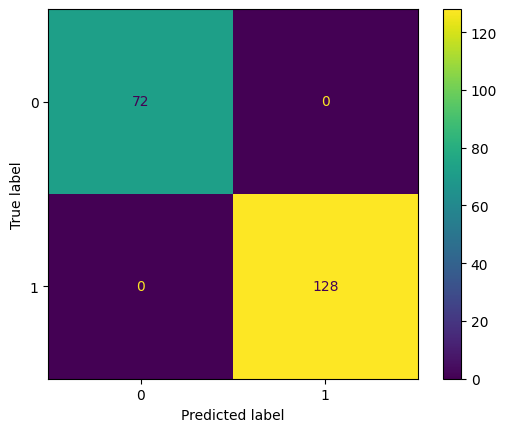

In [49]:
# isolate model data
model_data = full_data.drop(columns=['Unit_id','scores_P1', 'scores_P2', 'scores_P3', 'scores_P4', 'scores_P5', 'scores_P6', 'scores_P7', 'scores_P8', 'scores_P9', 'scores_P10', 'pass'])
X_train, X_test, y_train, y_test = train_test_split(model_data, full_data['pass'], test_size=.2)
# create model instance

bst = XGBClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 0.7)
# fit model
bst.fit(X_train, y_train)

# make predictions
preds = bst.predict(X_test)

accuracy = accuracy_score(y_test, preds)

print(f'Accuracy: {accuracy:f}')

# build confusion matrix
cm=confusion_matrix(y_test, preds)

# visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

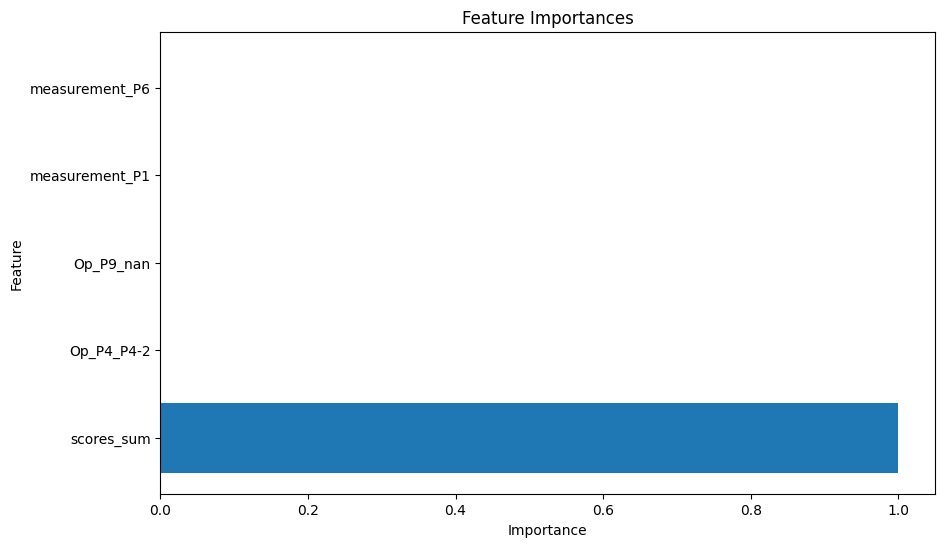

In [ ]:
feature_importances = bst.feature_importances_

# create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# isolate only the most impactful features
feature_importance_df = feature_importance_df.head(5)

# visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:


# hypertuning
'''
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 0],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0]
}

# Use Grid Search to find the best hyperparameters
grid_search = GridSearchCV(bst, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report or other evaluation metrics as needed
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:f}')
'''

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Accuracy: 1.000000
